In [2]:
! pip install SpaCy

  Obtaining dependency information for SpaCy from https://files.pythonhosted.org/packages/92/fb/d1f0605e1e8627226c6c96053fe1632e9a04a3fbcd8b5d715528cb95eb97/spacy-3.7.4-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for spacy-legacy<3.1.0,>=3.0.11 from https://files.pythonhosted.org/packages/c3/55/12e842c70ff8828e34e543a2c7176dac4da006ca6901c9e8b43efab8bc6b/spacy_legacy-3.0.12-py2.py3-none-any.whl.metadata
  Obtaining dependency information for spacy-loggers<2.0.0,>=1.0.0 from https://files.pythonhosted.org/packages/33/78/d1a1a026ef3af911159398c939b1509d5c36fe524c7b644f34a5146c4e16/spacy_loggers-1.0.5-py3-none-any.whl.metadata
  Obtaining dependency information for murmurhash<1.1.0,>=0.28.0 from https://files.pythonhosted.org/packages/71/46/af01a20ec368bd9cb49a1d2df15e3eca113bbf6952cc1f2a47f1c6801a7f/murmurhash-1.0.10-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for cymem<2.1.0,>=2.0.2 from https://files.pythonhosted.org/packages/c1/c3/dd

In [18]:
! pip install -U textblob

  Obtaining dependency information for textblob from https://files.pythonhosted.org/packages/02/07/5fd2945356dd839974d3a25de8a142dc37293c21315729a41e775b5f3569/textblob-0.18.0.post0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/626.3 kB ? eta -:--:--
   - -------------------------------------- 30.7/626.3 kB ? eta -:--:--
   ---- ---------------------------------- 71.7/626.3 kB 787.7 kB/s eta 0:00:01
   ------------ --------------------------- 194.6/626.3 kB 1.5 MB/s eta 0:00:01
   ---------------------------- ----------- 450.6/626.3 kB 2.6 MB/s eta 0:00:01
   ---------------------------------------- 626.3/626.3 kB 2.8 MB/s eta 0:00:00


In [22]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import string
import spacy

from matplotlib.pyplot import imread
from wordcloud import WordCloud, STOPWORDS


# for all NLP related operations on text
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import *
from nltk.classify import NaiveBayesClassifier
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
from collections import Counter

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score, classification_report
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

# To identify the sentiment of text
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer
from textblob.np_extractors import ConllExtractor

from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.pipeline import make_pipeline
from nltk.tokenize import RegexpTokenizer

# downloading stopwords corpus
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('vader_lexicon')
nltk.download('averaged_perceptron_tagger')
nltk.download('movie_reviews')
nltk.download('punkt')
nltk.download('conll2000')
nltk.download('brown')
stopwords = set(stopwords.words("english"))

# for showing all the plots inline
%matplotlib inline

#ignoring all warnings
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter(action='ignore', category=FutureWarning)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already u

In [23]:
# load the dataset
tweets=pd.read_csv(r'C:\Users\DELL\Downloads\Elon_musk.csv', encoding='Latin-1')
tweets.drop(['Unnamed: 0'],inplace=True,axis=1)
tweets.rename({'Text':'Tweets'},axis=1,inplace=True)
tweets

,Tweets
0,@kunalb11 Im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...
...,...
1994,"@flcnhvy True, it sounds so surreal, but the n..."
1995,@PPathole Make sure to read ur terms &amp; con...
1996,@TeslaGong @PPathole Samwise Gamgee
1997,@PPathole Altho Dumb and Dumber is <U+0001F525...


### EDA
#### Number of words

In [38]:
tweets['word_count'] = tweets['Tweets'].apply(lambda x: len(str(x).split(" ")))
tweets[['Tweets','word_count']].head()

,Tweets,word_count
0,@kunalb11 Im an alien,4
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,13
2,@joerogan @Spotify Great interview!,4
3,@gtera27 Doge is underestimated,4
4,@teslacn Congratulations Tesla China for amazi...,17


### Number of characters

In [39]:
tweets['char_count'] = tweets['Tweets'].str.len() ## this also includes spaces
tweets[['Tweets','char_count']].head()

,Tweets,char_count
0,@kunalb11 Im an alien,22
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,82
2,@joerogan @Spotify Great interview!,35
3,@gtera27 Doge is underestimated,31
4,@teslacn Congratulations Tesla China for amazi...,104


#### Average word length

In [40]:
def avg_word(sentence):
  words = sentence.split()
  return (sum(len(word) for word in words)/len(words))

tweets['avg_word'] = tweets['Tweets'].apply(lambda x: avg_word(x))
tweets[['Tweets','avg_word']].head()

,Tweets,avg_word
0,@kunalb11 Im an alien,4.750000
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,5.384615
2,@joerogan @Spotify Great interview!,8.000000
3,@gtera27 Doge is underestimated,7.000000
4,@teslacn Congratulations Tesla China for amazi...,5.176471


#### Number of stopwords

In [41]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

tweets['stopwords'] = tweets['Tweets'].apply(lambda x: len([x for x in x.split() if x in stop]))
tweets[['Tweets','stopwords']].head()

,Tweets,stopwords
0,@kunalb11 Im an alien,1
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,4
2,@joerogan @Spotify Great interview!,0
3,@gtera27 Doge is underestimated,1
4,@teslacn Congratulations Tesla China for amazi...,5


### Special characters

In [42]:
tweets['hashtags'] = tweets['Tweets'].apply(lambda x: len([x for x in x.split() if x.startswith('#')]))
tweets[['Tweets','hashtags']].head()

,Tweets,hashtags
0,@kunalb11 Im an alien,0
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,0
2,@joerogan @Spotify Great interview!,0
3,@gtera27 Doge is underestimated,0
4,@teslacn Congratulations Tesla China for amazi...,0


#### Numeric Values

In [43]:
tweets['numerics'] = tweets['Tweets'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
tweets[['Tweets','numerics']].head()

,Tweets,numerics
0,@kunalb11 Im an alien,0
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,0
2,@joerogan @Spotify Great interview!,0
3,@gtera27 Doge is underestimated,0
4,@teslacn Congratulations Tesla China for amazi...,0


#### Uppercase words

In [44]:
tweets['upper'] = tweets['Tweets'].apply(lambda x: len([x for x in x.split() if x.isupper()]))
tweets[['Tweets','upper']].head()

,Tweets,upper
0,@kunalb11 Im an alien,0
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,1
2,@joerogan @Spotify Great interview!,0
3,@gtera27 Doge is underestimated,0
4,@teslacn Congratulations Tesla China for amazi...,0


In [45]:
tweets.drop(['numerics','hashtags','stopwords','avg_word','char_count','word_count','upper'],axis=1,inplace=True)

#### Percentage of tweets are URL

In [46]:
tweets.Tweets.str.contains('https://').value_counts() / len(tweets)

Tweets
False    0.678339
True     0.321661
Name: count, dtype: float64

We can see that more than quarter of tweets are having URL

#### User tags in tweets

In [47]:
tweets.Tweets.str.contains('@').value_counts() / len(tweets)

Tweets
True     0.83942
False    0.16058
Name: count, dtype: float64

#### Total tweets

In [48]:
# Total tweets
print('Total tweets this period:', len(tweets.index), '\n')

Total tweets this period: 1999 



#### Spelling correction

In [49]:
from textblob import TextBlob
tweets['Tweets'][:5].apply(lambda x: str(TextBlob(x).correct()))

0                               @kunalb11 Im an alien
1    @ID_AA_Carmack May tracing on Cyberpunk with H...
2                   @joerogan @Notify Great interview!
3                       @gtera27 One is underestimated
4    @teslacn Congratulations Cela China for amazin...
Name: Tweets, dtype: object

#### Data visualization

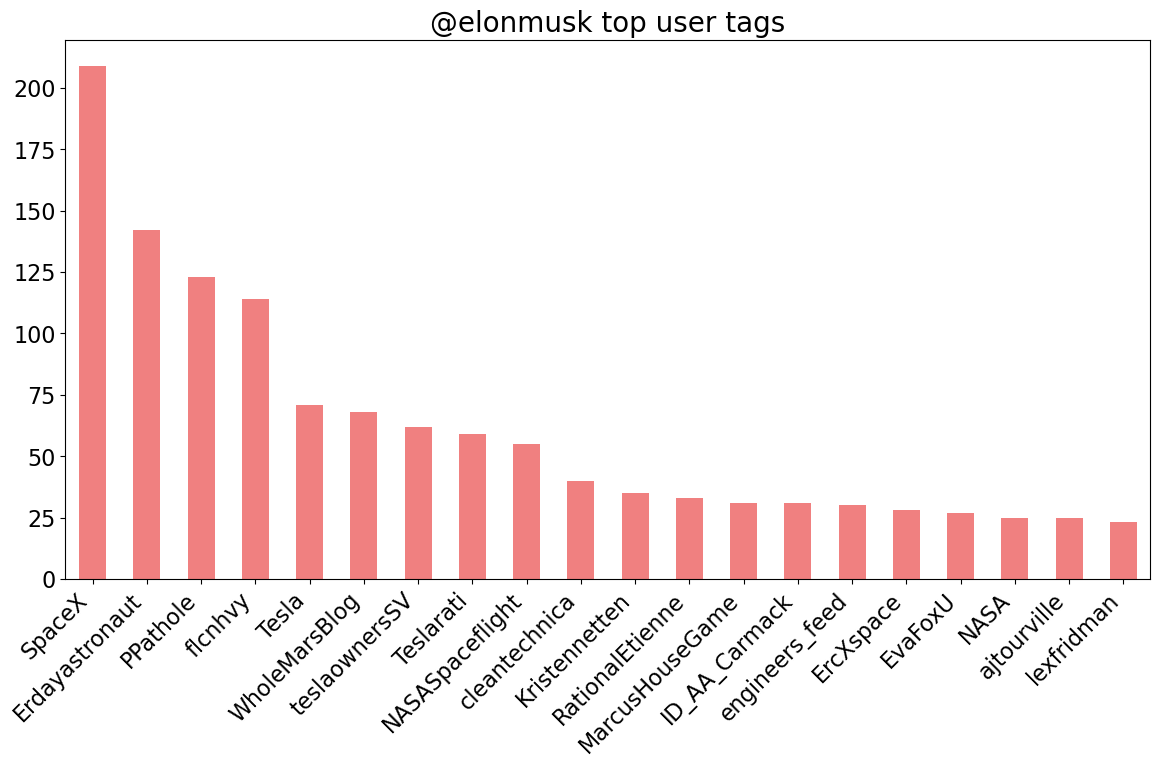

In [50]:
import itertools

c = list(
itertools.chain(
    *tweets.Tweets.map(lambda t: [handle.replace(":", "")[1:] for handle in t.split(" ") 
                            if '@' in handle.replace(":", "")]).tolist())
)

pd.Series(c).value_counts().head(20).plot.bar(
    figsize=(14, 7), fontsize=16, color='lightcoral'
)
plt.gca().set_title('@elonmusk top user tags', fontsize=20)
plt.gca().set_xticklabels(plt.gca().get_xticklabels(), rotation=45, ha='right', fontsize=16)
pass

### Finding N-grams

In [52]:

TextBlob(tweets['Tweets'][3]).ngrams(1)

[WordList(['gtera27']),
 WordList(['Doge']),
 WordList(['is']),
 WordList(['underestimated'])]

In [53]:
TextBlob(tweets['Tweets'][2]).ngrams(2)

[WordList(['joerogan', 'Spotify']),
 WordList(['Spotify', 'Great']),
 WordList(['Great', 'interview'])]

In [54]:
TextBlob(tweets['Tweets'][4]).ngrams(3)

[WordList(['teslacn', 'Congratulations', 'Tesla']),
 WordList(['Congratulations', 'Tesla', 'China']),
 WordList(['Tesla', 'China', 'for']),
 WordList(['China', 'for', 'amazing']),
 WordList(['for', 'amazing', 'execution']),
 WordList(['amazing', 'execution', 'last']),
 WordList(['execution', 'last', 'year']),
 WordList(['last', 'year', 'Now']),
 WordList(['year', 'Now', 'on']),
 WordList(['Now', 'on', 'to']),
 WordList(['on', 'to', 'the']),
 WordList(['to', 'the', 'next']),
 WordList(['the', 'next', 'for']),
 WordList(['next', 'for', 'even']),
 WordList(['for', 'even', 'more'])]

#### Text Preprocessing

In [55]:
tweets=[Text.strip() for Text in tweets.Tweets] # remove both the leading and the trailing characters
tweets=[Text for Text in tweets if Text] # removes empty strings, because they are considered in Python as False
tweets[0:10]

['@kunalb11 I\x92m an alien',
 '@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated',
 '@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!',
 'Happy New Year of the Ox! https://t.co/9WFKMYu2oj',
 'Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM',
 '@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)',
 '@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely']

#### Tweets into text

In [56]:
# Joining the list into one string/text
tweets_text=' '.join(tweets)
tweets_text[:1000]

'@kunalb11 I\x92m an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it? @joerogan @Spotify Great interview! @gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!! Happy New Year of the Ox! https://t.co/9WFKMYu2oj Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation. The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine It\x92s getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock my account @AstroJordy <U+0001F923><U

#### Removing usernames from tweets

In [57]:
# remove Twitter username handles from a given twitter text. (Removes @usernames)
from nltk.tokenize import TweetTokenizer
tknzr = TweetTokenizer(strip_handles=True)
tweets_tokens=tknzr.tokenize(tweets_text)
print(tweets_tokens[:100])

['I', '\x92', 'm', 'an', 'alien', 'Ray', 'tracing', 'on', 'Cyberpunk', 'with', 'HDR', 'is', 'next-level', '.', 'Have', 'you', 'tried', 'it', '?', 'Great', 'interview', '!', 'Doge', 'is', 'underestimated', 'Congratulations', 'Tesla', 'China', 'for', 'amazing', 'execution', 'last', 'year', '.', 'Now', 'on', 'to', 'the', 'next', 'for', 'even', 'more', '!', '!', 'Happy', 'New', 'Year', 'of', 'the', 'Ox', '!', 'https://t.co/9WFKMYu2oj', 'Frodo', 'was', 'the', 'underdoge', ',', 'All', 'thought', 'he', 'would', 'fail', ',', 'Himself', 'most', 'of', 'all', '.', 'https://t.co/zGxJFDzzrM', 'Haha', 'thanks', ':)', 'Indeed', '!', 'Tweets', 'definitely', 'do', 'not', 'represent', 'real-world', 'time', 'allocation', '.', 'The', 'most', 'entertaining', 'outcome', 'is', 'the', 'most', 'likely', 'Just', 'sent', 'some', 'Just', 'agree', 'to', 'do', 'Clubhouse', 'with']


#### Converting tweets into text

In [59]:
# Again Joining the list into one string/text
tweets_tokens_text=' '.join(tweets_tokens)
tweets_tokens_text[:1000]

'I \x92 m an alien Ray tracing on Cyberpunk with HDR is next-level . Have you tried it ? Great interview ! Doge is underestimated Congratulations Tesla China for amazing execution last year . Now on to the next for even more ! ! Happy New Year of the Ox ! https://t.co/9WFKMYu2oj Frodo was the underdoge , All thought he would fail , Himself most of all . https://t.co/zGxJFDzzrM Haha thanks :) Indeed ! Tweets definitely do not represent real-world time allocation . The most entertaining outcome is the most likely Just sent some Just agree to do Clubhouse with https://t.co/3rWE9uHSTS It \x92 s getting real Bought some Dogecoin for lil X , so he can be a toddler hodler He definitely has issues , but the sentencing seems a bit high Thanks for fixing Please unlock my account <U+0001F923> <U+0001F923> This is true power haha https://t.co/Fc9uhQSd7O Any crypto wallet that won \x92 t give you your private keys should be avoided at all costs Your app sucks RT : NASA has selected Falcon Heavy to 

#### Removing punctuations from text

In [60]:
# Remove Punctuations 
no_punc_text=tweets_tokens_text.translate(str.maketrans('','',string.punctuation))
no_punc_text[:1000]

'I \x92 m an alien Ray tracing on Cyberpunk with HDR is nextlevel  Have you tried it  Great interview  Doge is underestimated Congratulations Tesla China for amazing execution last year  Now on to the next for even more   Happy New Year of the Ox  httpstco9WFKMYu2oj Frodo was the underdoge  All thought he would fail  Himself most of all  httpstcozGxJFDzzrM Haha thanks  Indeed  Tweets definitely do not represent realworld time allocation  The most entertaining outcome is the most likely Just sent some Just agree to do Clubhouse with httpstco3rWE9uHSTS It \x92 s getting real Bought some Dogecoin for lil X  so he can be a toddler hodler He definitely has issues  but the sentencing seems a bit high Thanks for fixing Please unlock my account U0001F923 U0001F923 This is true power haha httpstcoFc9uhQSd7O Any crypto wallet that won \x92 t give you your private keys should be avoided at all costs Your app sucks RT  NASA has selected Falcon Heavy to launch the first two elements of the lunar Ga

#### Removing all URLs

In [61]:
# remove https or url within text
import re
no_url_text=re.sub(r'http\S+', '', no_punc_text)
no_url_text[:1000]

'I \x92 m an alien Ray tracing on Cyberpunk with HDR is nextlevel  Have you tried it  Great interview  Doge is underestimated Congratulations Tesla China for amazing execution last year  Now on to the next for even more   Happy New Year of the Ox   Frodo was the underdoge  All thought he would fail  Himself most of all   Haha thanks  Indeed  Tweets definitely do not represent realworld time allocation  The most entertaining outcome is the most likely Just sent some Just agree to do Clubhouse with  It \x92 s getting real Bought some Dogecoin for lil X  so he can be a toddler hodler He definitely has issues  but the sentencing seems a bit high Thanks for fixing Please unlock my account U0001F923 U0001F923 This is true power haha  Any crypto wallet that won \x92 t give you your private keys should be avoided at all costs Your app sucks RT  NASA has selected Falcon Heavy to launch the first two elements of the lunar Gateway together on one mission   Yes Once we can predict cash flow reason

#### Converting text into individual words

In [64]:
import nltk.data
from nltk.tokenize import word_tokenize
text_tokens=word_tokenize(no_url_text)
print(text_tokens[:100])

['I', '\x92', 'm', 'an', 'alien', 'Ray', 'tracing', 'on', 'Cyberpunk', 'with', 'HDR', 'is', 'nextlevel', 'Have', 'you', 'tried', 'it', 'Great', 'interview', 'Doge', 'is', 'underestimated', 'Congratulations', 'Tesla', 'China', 'for', 'amazing', 'execution', 'last', 'year', 'Now', 'on', 'to', 'the', 'next', 'for', 'even', 'more', 'Happy', 'New', 'Year', 'of', 'the', 'Ox', 'Frodo', 'was', 'the', 'underdoge', 'All', 'thought', 'he', 'would', 'fail', 'Himself', 'most', 'of', 'all', 'Haha', 'thanks', 'Indeed', 'Tweets', 'definitely', 'do', 'not', 'represent', 'realworld', 'time', 'allocation', 'The', 'most', 'entertaining', 'outcome', 'is', 'the', 'most', 'likely', 'Just', 'sent', 'some', 'Just', 'agree', 'to', 'do', 'Clubhouse', 'with', 'It', '\x92', 's', 'getting', 'real', 'Bought', 'some', 'Dogecoin', 'for', 'lil', 'X', 'so', 'he', 'can', 'be']


In [65]:
# Tokens count
len(text_tokens)

17847

#### Removing Stopwords

In [66]:
# Remove Stopwords
from nltk.corpus import stopwords
my_stop_words=stopwords.words('english')

sw_list = ['\x92','rt','ye','yeah','haha','Yes','U0001F923','I','U0001F3B6','U0001F5A4']
my_stop_words.extend(sw_list)

no_stop_tokens=[word for word in text_tokens if not word in my_stop_words]
print(no_stop_tokens[:100])

['alien', 'Ray', 'tracing', 'Cyberpunk', 'HDR', 'nextlevel', 'Have', 'tried', 'Great', 'interview', 'Doge', 'underestimated', 'Congratulations', 'Tesla', 'China', 'amazing', 'execution', 'last', 'year', 'Now', 'next', 'even', 'Happy', 'New', 'Year', 'Ox', 'Frodo', 'underdoge', 'All', 'thought', 'would', 'fail', 'Himself', 'Haha', 'thanks', 'Indeed', 'Tweets', 'definitely', 'represent', 'realworld', 'time', 'allocation', 'The', 'entertaining', 'outcome', 'likely', 'Just', 'sent', 'Just', 'agree', 'Clubhouse', 'It', 'getting', 'real', 'Bought', 'Dogecoin', 'lil', 'X', 'toddler', 'hodler', 'He', 'definitely', 'issues', 'sentencing', 'seems', 'bit', 'high', 'Thanks', 'fixing', 'Please', 'unlock', 'account', 'This', 'true', 'power', 'Any', 'crypto', 'wallet', 'give', 'private', 'keys', 'avoided', 'costs', 'Your', 'app', 'sucks', 'RT', 'NASA', 'selected', 'Falcon', 'Heavy', 'launch', 'first', 'two', 'elements', 'lunar', 'Gateway', 'together', 'one', 'mission']


In [67]:
# Making the Text in Lowercase
lower_words=[Text.lower() for Text in no_stop_tokens]
print(lower_words[:100])

['alien', 'ray', 'tracing', 'cyberpunk', 'hdr', 'nextlevel', 'have', 'tried', 'great', 'interview', 'doge', 'underestimated', 'congratulations', 'tesla', 'china', 'amazing', 'execution', 'last', 'year', 'now', 'next', 'even', 'happy', 'new', 'year', 'ox', 'frodo', 'underdoge', 'all', 'thought', 'would', 'fail', 'himself', 'haha', 'thanks', 'indeed', 'tweets', 'definitely', 'represent', 'realworld', 'time', 'allocation', 'the', 'entertaining', 'outcome', 'likely', 'just', 'sent', 'just', 'agree', 'clubhouse', 'it', 'getting', 'real', 'bought', 'dogecoin', 'lil', 'x', 'toddler', 'hodler', 'he', 'definitely', 'issues', 'sentencing', 'seems', 'bit', 'high', 'thanks', 'fixing', 'please', 'unlock', 'account', 'this', 'true', 'power', 'any', 'crypto', 'wallet', 'give', 'private', 'keys', 'avoided', 'costs', 'your', 'app', 'sucks', 'rt', 'nasa', 'selected', 'falcon', 'heavy', 'launch', 'first', 'two', 'elements', 'lunar', 'gateway', 'together', 'one', 'mission']


In [68]:
# Stemming 
from nltk.stem import PorterStemmer
ps=PorterStemmer()
stemmed_tokens=[ps.stem(word) for word in lower_words]
print(stemmed_tokens[:100])

['alien', 'ray', 'trace', 'cyberpunk', 'hdr', 'nextlevel', 'have', 'tri', 'great', 'interview', 'doge', 'underestim', 'congratul', 'tesla', 'china', 'amaz', 'execut', 'last', 'year', 'now', 'next', 'even', 'happi', 'new', 'year', 'ox', 'frodo', 'underdog', 'all', 'thought', 'would', 'fail', 'himself', 'haha', 'thank', 'inde', 'tweet', 'definit', 'repres', 'realworld', 'time', 'alloc', 'the', 'entertain', 'outcom', 'like', 'just', 'sent', 'just', 'agre', 'clubhous', 'it', 'get', 'real', 'bought', 'dogecoin', 'lil', 'x', 'toddler', 'hodler', 'he', 'definit', 'issu', 'sentenc', 'seem', 'bit', 'high', 'thank', 'fix', 'pleas', 'unlock', 'account', 'thi', 'true', 'power', 'ani', 'crypto', 'wallet', 'give', 'privat', 'key', 'avoid', 'cost', 'your', 'app', 'suck', 'rt', 'nasa', 'select', 'falcon', 'heavi', 'launch', 'first', 'two', 'element', 'lunar', 'gateway', 'togeth', 'one', 'mission']


In [82]:
lemma = WordNetLemmatizer()

In [85]:
for i in tweets:
    words = word_tokenize(i)
    for i in words:
        if i not in stopwords.words('english'):
            print(lemma.lemmatize(i))

@
kunalb11
Im
alien
@
ID_AA_Carmack
Ray
tracing
Cyberpunk
HDR
next-level
.
Have
tried
?
@
joerogan
@
Spotify
Great
interview
!
@
gtera27
Doge
underestimated
@
teslacn
Congratulations
Tesla
China
amazing
execution
last
year
.
Now
next
even
!
!
Happy
New
Year
Ox
!
http
:
//t.co/9WFKMYu2oj
Frodo
underdoge
,
All
thought
would
fail
,
Himself
.
http
:
//t.co/zGxJFDzzrM
@
OwenSparks_
@
flcnhvy
@
anonyx10
Haha
thanks
:
)
@
flcnhvy
@
anonyx10
Indeed
!
Tweets
definitely
represent
real-world
time
allocation
.
The
entertaining
outcome
likely
@
GiveDirectly
Just
sent
Just
agree
Clubhouse
@
kanyewest
http
:
//t.co/3rWE9uHSTS
@
geoffkeighley
@
UnrealEngine
Its
getting
real
Bought
Dogecoin
lil
X
,
toddler
hodler
@
JoshManMode
He
definitely
issue
,
sentencing
seems
bit
high
@
freewalletorg
Thanks
fixing
@
freewalletorg
Please
unlock
account
@
AstroJordy
<
U+0001F923
>
<
U+0001F923
>
This
true
power
haha
http
:
//t.co/Fc9uhQSd7O
@
freewalletorg
Any
crypto
wallet
wont
give
private
key
avoided
cost
@
f

@
Megaconstellati
@
Aviation_Intel
@
jetcitystar
@
larrypress
Yup
@
TeslaGong
@
teslaownersSV
@
cleantechnica
I
hope
@
Tesmanian_com
These
also
laser
link
satellite
,
ground
station
needed
pole
@
teslaownersSV
@
cleantechnica
Sorry
version
confusion
.
V8.1
say
FSD
.
Separate
version
number
rest
car
.
@
cleantechnica
To
surprise
,
Tesla
better
AI
hardware
&
amp
;
software
Waymo
(
money
)
@
RicGuccio
@
teslaownersSV
It
float
@
flcnhvy
@
boringcompany
Fallout-themed
opening
party
Vegas
Loop
happening
soon
allowed
!
@
Alex_E_Benton
@
boringcompany
<
U+0001F923
>
<
U+0001F923
>
Under
Vegas
@
boringcompany
tunnel
yesterday
boy
http
:
//t.co/tLfOuiEdFm
@
PPathole
@
SpaceX
Lasers
RT
@
SpaceX
:
SpaceXs
rideshare
offering
provides
increased
access
space
small
satellite
operator
seeking
reliable
,
affordable
rid
RT
@
SpaceX
:
Falcon
9s
first
stage
landed
Of
Course
I
Still
Love
You
droneship
http
:
//t.co/6gWWlLiXdG
RT
@
SpaceX
:
Liftoff
!
http
:
//t.co/js3zVM77rH
@
CodeWisdom
<
U+0001F4AF
>
@
t

isnt
needed
,
make
self-driving
better
.
It
isnt
enough
safer
human
driver
,
Aut
http
:
//t.co/dyy2rMhgIl
Ignore
heading
Great
interview
Mathias
Döpfner
http
:
//t.co/ewnaHc4cH0
@
jack
<
U+0001F3A9
>
The
Greatest
Gatsby
<
U+0001F3A9
>
@
flcnhvy
Inspired
ballet
@
smvllstvrs
@
ErcXspace
Rocket
motion
primarily
vertical
,
want
top
open
@
jack
Lets
make
roaring
20s
!
@
Erdayastronaut
Might
lump
along
way
@
Erdayastronaut
@
flcnhvy
@
ErcXspace
Production
hard
,
prototype
easy
.
Building
~1000
Starships
create
http
:
//t.co/XJLLjplJbP
@
ICannot_Enough
@
AloysiusFekete
@
RationalEtienne
@
biogirl09
@
ErcXspace
Exactly
@
RexChapman
Haha
@
Erdayastronaut
@
flcnhvy
@
ErcXspace
SN9
press
CH4
header
tank
helium
.
Long-term
solution
debate
.
http
:
//t.co/kaWWoL54jG
@
flabellina212
@
RationalEtienne
@
biogirl09
@
ErcXspace
Yes
@
RationalEtienne
@
biogirl09
@
ErcXspace
Legs
would
certainly
work
,
best
part
part
,
best
step
step
@
flcnhvy
@
ErcXspace
Yes
@
flcnhvy
@
ErcXspace
Saves
mass
&
amp
;
c

pad
South
Texas
http
:
//t.co/RcYOXXpTc2
RT
@
Space_Station
:
The
station
@
SpaceX
#
Dragon
going
orbital
night
period
1:30pm
ET
docking
.
The
#
CrewDragon
@
Space_Station
@
SpaceX
Wow
,
Station
look
amazing
!
RT
@
NASA
:
Good
morning
,
earthling
.
<
U+2600
>
<
U+FE0F
>
The
journey
continues
!
Watch
NASA
@
SpaceX
cargo
resupply
mission
dock
@
Space_Statio
@
NASASpaceflight
Knock
,
knock
,
singing
telegram
!
@
lexfridman
Carrying
even
symbiotic
bacteria
(
~40
trillion
)
cell
@
AdamKlotz_
@
lexfridman
Yes
@
lexfridman
We
mobile
cell
colony
100
RT
@
SpaceX
:
Tracking
footage
helicopter
todays
Falcon
9
launch
LC-39A
http
:
//t.co/7rYVZRTS18
RT
@
Erdayastronaut
:
Theres
something
genuinely
magical
seeing
#
Starship
#
SN8
person
.
Boca
Chica
beautiful
,
quiet
serine
.
T
Im
Gespräch
mit
Mathias
Döpfner
http
:
//t.co/bqa5pIAOnk
RT
@
SpaceX
:
Dragon
separation
confirmed
;
spacecraft
way
@
space_station
.
Autonomous
docking
tomorrow
approximately
1
RT
@
SpaceX
:
Falcon
9
booster
landed
Of
Cour

@
flcnhvy
And
case
high
(
non-infectious
)
Ct
quarantine
day
,
getting
another
test
.
Seco
http
:
//t.co/oAlvZwCMIO
@
tobyliiiiiiiiii
So
many
thing
want
&
amp
;
didnt
know
wanted
@
nichegamer
Maybe
little
Mercy
http
:
//t.co/9iE40HOihr
Tesla
holiday
software
release
<
U+0001F525
>
<
U+0001F525
>
@
StaceyR28715306
@
Maisie_Williams
<
U+0001F60F
>
Cobra
Kai
deep
cut
@
archillect
Its
cake
&
amp
;
someone
took
bite
@
nichegamer
There
thing
much
sentience
Deus
ex
machine
learning
http
:
//t.co/5ZSYalVczx
@
peterrhague
Its
designed
make
life
multiplanetary
,
otherwise
extreme
overkill
mere
Earth
sector
activity
!
http
:
//t.co/yjLTT8pEEu
@
Kristennetten
@
royalsociety
More
like
gave
blessing
.
It
sort
groundswell
believed
http
:
//t.co/fwK1ziHfEg
Nullius
Verba
@
royalsociety
@
westcoastbill
Indeed
@
ReflexFunds
@
nickidk4
@
pcgamer
Dojo/Doge
@
PPathole
@
Erdayastronaut
@
rweb11742
Yeah
,
look
like
marginal
cost
launch
le
$
1M
1
http
:
//t.co/rNSJ5FkDXT
@
speculawyer
@
Erdayastronaut
@
rwe

@
MKBHD
@
Vyyyper
Will
worth
@
MKBHD
Exactly
@
Model3Owners
@
MKBHD
Sure
@
MKBHD
Actually
,
its
still
http
:
//t.co/2zLKc8Fc2d
@
Ed_Spartan_117
@
Tesla
@
NYKChannel
Wait
see
Cybertruck
@
MKBHD
This
accidental
.
Will
back
shortly
.
RT
@
Tesla
:
20k
Superchargers
counting
http
:
//t.co/urudyt9Eui
@
Erdayastronaut
@
RenataKonkoly
@
SpaceNews_Inc
Am
hoping
change
booster
design
land
back
launch
mount
http
:
//t.co/HpRGPtt6ru
@
Vasu42698392
@
amyceskridge
Chip
temp
sensor
&
amp
;
automatically
maintains
safe
temp
@
reganlovetesla
@
RenataKonkoly
@
SpaceNews_Inc
Enough
already
plate
&
amp
;
Teslas
.
Maybe
one
day
prototy
http
:
//t.co/tGPWEJ7WQA
@
amyceskridge
Neuralink
wont
overclock
brain
,
transfer
processing
supercomputer
extension
yo
http
:
//t.co/NByBBFX0T2
@
flcnhvy
@
PPathole
@
cleantechnica
We
rewrote
labeling
software
4D
.
Very
different
labeling
single
phot
http
:
//t.co/mLTBdsQuTy
@
PPathole
@
cleantechnica
Version
1
year
away
@
RenataKonkoly
@
SpaceNews_Inc
It
would
appear
ca

extremely
slow
&
amp
;
cautious
,
.
Data
3
engine
Starship
static
fire
morning
look
good
.
Proceeding
nosecone
mate
.
@
PPathole
@
toadmeister
Yes
.
We
also
consider
population
life-months
lost
lockdown
&
amp
;
restriction
http
:
//t.co/0Ct2sVAngy
@
toadmeister
Sweden
zero
death
Oct
15
http
:
//t.co/Gy9a20uMmX
@
JoshTownsend_96
Yes
@
juanjacobs
@
jwangARK
Firmware
probably
slightly
accurate
description
,
yes
RT
@
Tesla
:
There
's
place
like
home
..
especially
Solar
Roof
.
This
Kansas
ranch
got
installed
4
day
.
@
PPathole
@
flyerandyp
@
mojosusan
Mobi-C
much
mobility
,
fusion
little
.
We
need
Mobi-D
haha
.
@
flyerandyp
@
mojosusan
Actually
,
its
neck
http
:
//t.co/2vCoAxsrV3
@
flyerandyp
@
mojosusan
Maybe
I
helpful
.
Had
Mobi-C
disc
put
C5-C6
,
however
1st
surgery
failed
remov
http
:
//t.co/Czykfyo0IX
@
jwangARK
Pretty
accurate
.
Its
much
DNA
sequencing
using
synthetic
DNA/RNA
fix
bug
code
http
:
//t.co/y6GcySVGhM
@
SamTalksTesla
London
Beijing
would
cool
@
SamTalksTesla
Wow
,
would


mass
orbit
well
$
100/kg
.
Fully
burdened
cost
depends
flight
rate
.
@
WholeMarsBlog
Prototypes
piece
cake
,
high
volume
production
new
technology
extremely
hard
.
Ta
http
:
//t.co/O1oJwfJ2zG
@
WholeMarsBlog
We
expect
make
heavy
use
LFP
medium
range
car
&
amp
;
stationary
storage
@
WholeMarsBlog
Berlin
use
4680
cell
structural
battery
pack
&
amp
;
front
&
amp
;
rear
single
piece
casting
.
Also
,
http
:
//t.co/pTeAj9z79i
@
AstroJordy
@
WholeMarsBlog
They
@
WholeMarsBlog
I
wish
company
would
put
spreadsheet
moment
focus
making
http
:
//t.co/LCkXzfpoZx
@
PPathole
@
klod_ua
@
Erdayastronaut
@
TrevorMahlmann
@
johnkrausphotos
@
Mike_Seeley
7
bar
absolute
,
fine
http
:
//t.co/Afru9AdajY
@
klod_ua
@
Erdayastronaut
@
TrevorMahlmann
@
johnkrausphotos
@
Mike_Seeley
Cryo
pressure
test
succeeded
,
small
le
http
:
//t.co/2wYticEwfr
@
Erdayastronaut
@
TrevorMahlmann
@
johnkrausphotos
@
Mike_Seeley
One
best
shot
ever
!
@
SamTalksTesla
@
SpaceX
Much
sooner
@
mdcainjr
@
SpaceX
@
45thSpaceWing
@
NASA
Gr

@
xiang_aw
@
WholeMarsBlog
This
seem
like
opposite
open
.
OpenAI
essentially
captured
Microsoft
.
@
WholeMarsBlog
Haha
true
@
oneandonlyheady
Maybe
I
@
TechAmazing
@
UniverCurious
Jets
cool
@
flcnhvy
@
Gfilche
@
YahooFinance
Pretty
much
@
1stPrinciples4L
@
Gfilche
@
YahooFinance
Yes
@
Gfilche
@
YahooFinance
Yahoo
Finance
dumb
sound
@
ICannot_Enough
Yes
@
Neopork85
@
SpaceX
Haha
@
tobyliiiiiiiiii
@
Tesla
Roadster
better
@
PPathole
Probably
Cybertruck
,
ATV
,
Roadster
&
amp
;
Semi
C
A
R
S
http
:
//t.co/4Aq1A5cYkH
@
FutureJurvetson
@
hiromichimizuno
Thanks
many
year
support
tough
time
!
@
ICannot_Enough
@
WholeMarsBlog
We
little
year
(
challenging
year
weve
ever
)
,
http
:
//t.co/YgDE1OsZXA
@
WholeMarsBlog
Thats
right
.
Maybe
little
faster
.
@
umutcnbostanci
Yes
@
teslaownersSV
cgi
irl
@
tobyliiiiiiiiii
@
CARandDRIVER
@
Tesla
Haha
RT
@
CARandDRIVER
:
We
drove
Model
S
Long
Range
Plus
422.7
mile
California
believe
could
made
430
.
@
Tesla
explain
The
extreme
difficulty
scaling
production


@
EvaFoxU
13
@
Teslarati
Rawlinson
didnt
design
Model
S.
Prototype
done
joined
&
amp
;
left
u
lurch
http
:
//t.co/oy9yVM84xm
@
Erdayastronaut
@
PPathole
@
SpaceX
Were
pretty
close
manufacturing
size
limit
milled
copper
&
amp
;
steel
ja
http
:
//t.co/T8d3yN4xRy
A
la
guerre
comme
à
la
guerre
@
harsimranbansal
Haha
@
BnOrdhaug
And
start
tweeting
If
bombard
Earth
enough
photon
,
eventually
emits
Tesla
(
AK
)
@
ID_AA_Carmack
There
already
bidirectional
communication
human
&
amp
;
AI
via
phone
&
amp
;
computer
.
Its
lo
http
:
//t.co/t42iuaZMwH
@
Erdayastronaut
@
PPathole
@
SpaceX
Above
50
%
likely
make
@
PPathole
@
SpaceX
This
test
engine
.
Flight
article
fixed
gimbal
.
@
SpaceX
Worth
noting
thrust
slightly
higher
big
bell
nozzle
version
.
Larger
bell
primarily
http
:
//t.co/KIeGOvt0rD
RT
@
SpaceX
:
The
first
Raptor
Vacuum
engine
(
RVac
)
Starship
shipped
SpaceXs
rocket
factory
Hawthorne
,
California
dev
@
Tesmanian_com
Yes
@
skorusARK
Chart
understates
lithium-ion
potential
roughly
1/3


powered
miniverse
inside
microverse
http
:
//t.co/aduoTl537T
@
flcnhvy
Exactly
@
Erdayastronaut
@
Tesla
No
,
were
focused
developing
new
product
&
amp
;
scaling
production
@
flcnhvy
@
neuralink
Yes
,
show
V2
.
Still
far
LASIK
,
could
get
pretty
close
year
.
Lengthy
background
Neuralink
@
waitbutwhy
http
:
//t.co/z2YfAupDRD
Live
webcast
working
@
Neuralink
device
Friday
3pm
Pacific
http
:
//t.co/PouLbrGzFU
@
engineers_feed
Astronaughty
@
OwenSparks_
@
PPathole
@
Erdayastronaut
@
dauqhx
@
universal_sci
No
@
PPathole
@
Erdayastronaut
@
dauqhx
@
universal_sci
Mars
easier
moon
propellant
production
.
Could
get
http
:
//t.co/ToySP1uKiF
@
Erdayastronaut
@
dauqhx
@
universal_sci
Starship
propellant
~78
%
oxygen
,
O2
plant
moon
would
enou
http
:
//t.co/1TUKV0HViG
@
waitbutwhy
Now
I
want
candy
@
dauqhx
@
universal_sci
Theres
lot
frozen
CO2
&
amp
;
H2O
Mars
.
Heating
planet
densify
atmosphere
.
Its
solvable
.
@
universal_sci
Perhaps
one
day
ocean
northern
part
Mars
@
jchybow
@
jwangARK
@
winto

>
<
U+FE0F
>
@
WholeMarsBlog
<
U+0001F923
>
<
U+0001F923
>
Please
trash
Wikipedia
,
Im
begging
History
written
victor
except
Wikipedia
haha
@
nickcappelli
@
Grimezsz
Cover
Barbie
Girl
@
tbdnonymous
Yes
.
Probably
accurate
say
Great
Filters
plural
.
@
nickcappelli
@
Grimezsz
Yes
,
its
called
Cyber
Girl
We
must
pas
The
Great
Filter
Sounds
right
http
:
//t.co/dm76FJq3hX
@
Dr_rami
@
tomdestella
@
RobertDowneyJr
Seriously
@
long_elon
Crysis
rock
A
truly
useful
exaflop
de
facto
FP32
@
Kristennetten
@
engineers_feed
Metal
fudge-like
consistency
near
melting
point
,
smoosh
together
@
engineers_feed
This
make
Falcon
9
http
:
//t.co/mDoPO17YB9
http
:
//t.co/326rkUEYW8
@
flcnhvy
@
ICannot_Enough
@
Tesla
This
hand
,
hard
predict
.
Maybe
order
10
billion
km
http
:
//t.co/38fzby8pNO
@
austinbarnard45
Yes
@
realwillreil
@
GiulioCoraggio
<
U+0001F923
>
<
U+0001F923
>
hasty
govt
<
U+0001F923
>
<
U+0001F923
>
@
teslaownersSV
@
PPathole
@
ICannot_Enough
@
flcnhvy
@
Tesla
A
lot
work
remains
.
Technicall

@
Erdayastronaut
@
SpaceX
All
correct
.
Parachutes
originally
backup
landing
system
,
SuperDraco
thruster
http
:
//t.co/941A2oDu5H
@
meier1028
@
SpaceX
@
Space_Station
@
AstroBehnken
@
Astro_Doug
Great
game
@
NatalCicuto
@
Tesla
@
Kristennetten
@
TeslaForThe_Win
Working
RT
@
Commercial_Crew
:
.
@
Astro_Doug
&
amp
;
@
AstroBehnken
spend
one
night
space
prior
returning
homeland
,
Earth
.
While
RT
@
NASA
:
The
view
inside
@
SpaceX
Dragon
Endeavour
,
@
AstroBehnken
&
amp
;
@
Astro_Doug
monitor
departure
@
Space_Station
:
ht
RT
@
SpaceX
:
Separation
confirmed
.
Dragon
performing
4
departure
burn
move
away
@
Space_Station
http
:
//t.co/ea14fozdO8
RT
@
SpaceX
:
Crew
Dragon
depart
@
Space_Station
@
AstroBehnken
@
Astro_Doug
6
hour
splash
coast
@
engineeringvids
The
simplest
solution
necessarily
satisfying
RT
@
cleantechnica
:
Tesla
Autopilot
Accidents
:
1
4,530,000
Miles
;
US
Average
:
1
479,000
Miles
http
:
//t.co/NnBeTmY1Tr
RT
@
Tesla
:
Tesla
Q2
Vehicle
Safety
Report
http
:
//t.co/C7no6bBwGc

movie
Gaslight
@
LoomisP_
@
MSNBC
@
11thHour
Well
said
,
Brian
Williams
!
@
FutureJurvetson
Great
shot
!
RT
@
SpaceX
:
Videos
yesterdays
catch
fairing
half
http
:
//t.co/yzTDFzlulL
@
FaZeBlaze
<
U+0001F44D
>
@
SamTalksTesla
Sometimes
,
thats
I
feel
!
@
PPathole
@
Teslarati
@
BocaChicaGal
Will
attempt
fly
later
week
@
sri_myneni
@
Erdayastronaut
@
considercosmos
@
SpaceX
Sound
&
amp
;
flame
color
quite
different
@
glenn22x
@
Teslarati
@
BocaChicaGal
Yes
@
Teslarati
@
BocaChicaGal
Were
rapidly
changing
alloy
constituent
&
amp
;
forming
method
,
traditional
name
like
304
http
:
//t.co/FYUuio5Dtz
@
flcnhvy
<
U+0001F923
>
<
U+0001F923
>
@
cleantechnica
At
point
,
probably
advertising
art/communication/entertainment
&
amp
;
support
high
quality
medium
RT
@
SpaceX
:
Watch
Falcon
9
launch
ANASIS-II
<
U+2192
>
http
:
//t.co/bJFjLCzWdK
http
:
//t.co/iYHJZnZobv
Das
baby
kann
noch
keinen
löffel
benutzen
http
:
//t.co/UETqVIA4BP
@
JohnnaCrider0
@
YStijd
@
ID_AA_Carmack
Its
almost
right
@
YStijd

### Feature Extraction

In [106]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
tweetscv=cv.fit_transform(stemmed_tokens)

In [107]:
print(cv.vocabulary_)

{'alien': 197, 'ray': 2228, 'trace': 2872, 'cyberpunk': 746, 'hdr': 1318, 'nextlevel': 1876, 'have': 1313, 'tri': 2889, 'great': 1262, 'interview': 1489, 'doge': 861, 'underestim': 3032, 'congratul': 660, 'tesla': 2782, 'china': 574, 'amaz': 219, 'execut': 1016, 'last': 1572, 'year': 3245, 'now': 1903, 'next': 1875, 'even': 995, 'happi': 1299, 'new': 1873, 'ox': 1991, 'frodo': 1165, 'underdog': 3031, 'all': 199, 'thought': 2815, 'would': 3230, 'fail': 1049, 'himself': 1359, 'haha': 1288, 'thank': 2790, 'inde': 1447, 'tweet': 2916, 'definit': 782, 'repres': 2284, 'realworld': 2241, 'time': 2831, 'alloc': 200, 'the': 2794, 'entertain': 968, 'outcom': 1970, 'like': 1623, 'just': 1530, 'sent': 2430, 'agre': 182, 'clubhous': 604, 'it': 1508, 'get': 1219, 'real': 2236, 'bought': 452, 'dogecoin': 863, 'lil': 1624, 'toddler': 2842, 'hodler': 1364, 'he': 1319, 'issu': 1507, 'sentenc': 2431, 'seem': 2418, 'bit': 412, 'high': 1351, 'fix': 1108, 'pleas': 2081, 'unlock': 3054, 'account': 145, 'thi'

In [115]:
cv.get_feature_names_out()

array(['000', '005', '10', ..., 'zon', 'zone', 'ðogecoin'], dtype=object)

In [116]:
print(tweetscv.toarray()[100:200])

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [117]:
print(tweetscv.toarray().shape)

(11445, 3264)


#### CountVectorizer with N-grams (Bigrams & Trigrams)

In [119]:
cv_ngram_range=CountVectorizer(analyzer='word',ngram_range=(1,3),max_features=100)
bow_matrix_ngram=cv_ngram_range.fit_transform(stemmed_tokens)

In [121]:
print(cv_ngram_range.get_feature_names_out())
print(bow_matrix_ngram.toarray())

['actual' 'also' 'back' 'best' 'better' 'booster' 'car' 'come' 'complet'
 'cool' 'could' 'crew' 'day' 'design' 'differ' 'dragon' 'earth' 'engin'
 'even' 'ever' 'exactli' 'falcon' 'first' 'flight' 'fsd' 'futur' 'get'
 'go' 'good' 'great' 'haha' 'hard' 'high' 'hope' 'if' 'improv' 'it' 'land'
 'launch' 'like' 'look' 'lot' 'make' 'mani' 'mar' 'mayb' 'mission' 'model'
 'much' 'need' 'new' 'next' 'no' 'not' 'ok' 'one' 'orbit' 'part' 'peopl'
 'point' 'pretti' 'probabl' 'product' 'right' 'rocket' 'rt' 'seem' 'soon'
 'space' 'spacex' 'starlink' 'starship' 'still' 'super' 'sure' 'tesla'
 'test' 'thank' 'that' 'the' 'there' 'they' 'thi' 'think' 'time' 'tri'
 'true' 'ufe0f' 'us' 'use' 'way' 'we' 'week' 'well' 'will' 'work' 'would'
 'yeah' 'year' 'you']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


### TF-IDF Vectorizer

In [122]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidfv_ngram_max_features=TfidfVectorizer(norm='l2',analyzer='word',ngram_range=(1,3),max_features=500)
tfidf_matix_ngram=tfidfv_ngram_max_features.fit_transform(stemmed_tokens)

In [124]:
print(tfidfv_ngram_max_features.get_feature_names_out())
print(tfidf_matix_ngram.toarray())

['10' '13' '20' '2020' '30' '40' '60' 'abl' 'absolut' 'access' 'accur'
 'actual' 'advanc' 'ago' 'agre' 'ai' 'aim' 'air' 'all' 'almost' 'alreadi'
 'also' 'although' 'amaz' 'and' 'anoth' 'appear' 'appli' 'appreci'
 'approv' 'around' 'articl' 'as' 'astronaut' 'at' 'autopilot' 'awesom'
 'back' 'bad' 'bar' 'base' 'batteri' 'berlin' 'best' 'beta' 'better' 'big'
 'bit' 'boca' 'bodi' 'booster' 'brain' 'bs' 'build' 'but' 'call' 'camera'
 'can' 'car' 'cargo' 'cast' 'cell' 'ch4' 'chanc' 'chang' 'china' 'civil'
 'close' 'cold' 'color' 'come' 'commun' 'compani' 'complet' 'comput'
 'confirm' 'congratul' 'control' 'convert' 'cool' 'cost' 'could' 'cours'
 'cov' 'crazi' 'creat' 'crew' 'critic' 'curevac' 'current' 'cyberpunk'
 'cybertruck' 'data' 'day' 'deep' 'definit' 'deliveri' 'depend' 'design'
 'detail' 'develop' 'differ' 'direct' 'dock' 'doge' 'dojo' 'done' 'dragon'
 'drive' 'droneship' 'due' 'earli' 'earlier' 'earth' 'easi' 'effici'
 'electr' 'enabl' 'end' 'energi' 'engin' 'enough' 'entertain' 'en

In [135]:
# Counting the noun & verb tokens
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

X=cv.fit_transform(stemmed_tokens)
sum_words=X.sum(axis=0)

words_freq=[(word,sum_words[0,idx]) for word,idx in cv.vocabulary_.items()]
words_freq=sorted(words_freq, key=lambda x: x[1], reverse=True)

wd_df=pd.DataFrame(words_freq)
wd_df.columns=['word','count']
wd_df[0:10] # viewing top ten results

,word,count
0,rt,127
1,tesla,99
2,the,81
3,we,81
4,great,77
5,it,76
6,launch,64
7,thi,61
8,engin,58
9,need,53


<Axes: title={'center': 'Top 10 nouns and verbs'}, xlabel='word'>

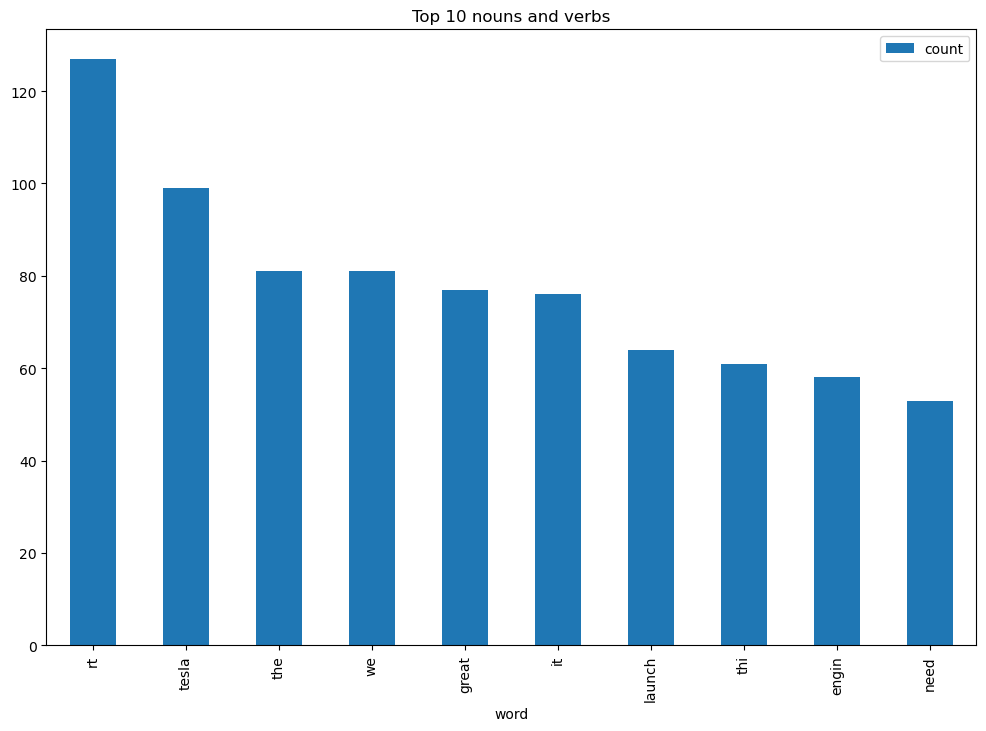

In [136]:
wd_df[0:10].plot.bar(x='word',figsize=(12,8),title='Top 10 nouns and verbs')